# Classificação com KNN

Este notebook explora a aplicação do algoritmo **K-Nearest Neighbors (KNN)** em um conjunto de dados sintético 2D, gerado artificialmente. O objetivo é entender visualmente como o modelo funciona, avaliando sua performance e limites de decisão.

---

- [1. Geração de Dados Sintéticos](#1-gera%C3%A7%C3%A3o-de-dados-sint%C3%A9ticos)
- [2. Visualização Inicial dos Dados](#2-visualiza%C3%A7%C3%A3o-inicial-dos-dados)
- [3. Separação em Treinamento e Teste](#3-separa%C3%A7%C3%A3o-em-treinamento-e-teste)
- [4. Padronização dos Dados](#4-padroniza%C3%A7%C3%A3o-dos-dados)
- [5. Treinamento com o KNN](#5-treinamento-com-o-knn)
- [6. Avaliação com Matriz de Confusão](#6-avalia%C3%A7%C3%A3o-com-matriz-de-confus%C3%A3o)
- [7. Visualização dos Limites de Decisão](#7-visualiza%C3%A7%C3%A3o-dos-limites-de-decis%C3%A3o)
- [8. Predição de um Novo Ponto](#8-predi%C3%A7%C3%A3o-de-um-novo-ponto)
- [9. Considerações sobre o KNN](#9-considera%C3%A7%C3%B5es-sobre-o-knn)


## 1. Geração de Dados Sintéticos

Usaremos o `make_classification` para criar um conjunto de dados com duas features (x1, x2) e duas classes (0 e 1).

In [35]:
# Importação das bibliotecas

# Data Manipulation & Analysis
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt

# Exemplo com dataset de câncer de mama do sklearn
from sklearn.datasets import make_classification

# Preprocessing & Feature Engineering
from sklearn.preprocessing import StandardScaler

# Machine Learning Models
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Metrics & Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [36]:
X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    class_sep=1.2,
    random_state=42
)

## 2. Visualização Inicial dos Dados

Vamos exibir os dados em um gráfico de dispersão 2D, colorido pelas classes.

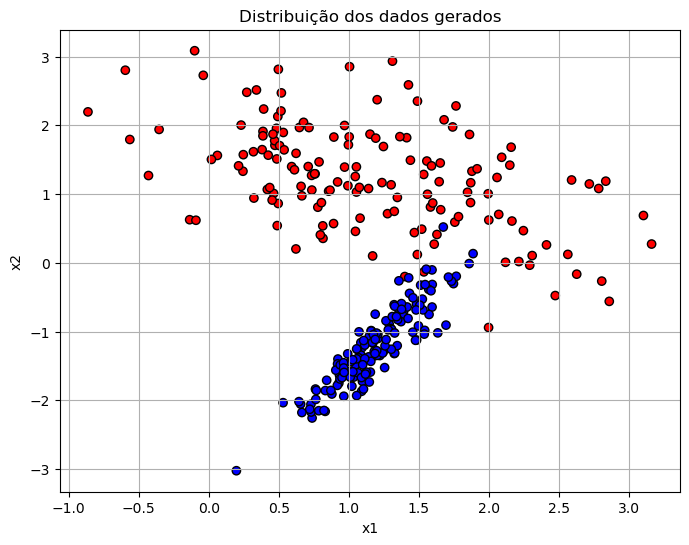

In [37]:
# Converte para DataFrame
X = pd.DataFrame(X, columns=["x1", "x2"])
y = pd.Series(y)

plt.figure(figsize=(8,6))
plt.scatter(X["x1"], X["x2"], c=y, cmap="bwr", edgecolor='k')
plt.title("Distribuição dos dados gerados")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

## 3. Separação em Treinamento e Teste

Separamos os dados em treino (70%) e teste (30%) com `train_test_split`.

In [38]:
# Separação para trenamento

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4. Padronização dos Dados

O KNN é sensível à escala dos dados. Vamos usar `StandardScaler` para padronizar as features.

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5. Treinamento com o KNN

Treinamos o classificador com `KNeighborsClassifier` usando `k=5` como valor padrão.

In [40]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

## 6. Avaliação com Matriz de Confusão

Vamos avaliar o modelo com a matriz de confusão e métricas de classificação.

Matriz de Confusão:
[[45  1]
 [ 1 43]]

Relatório de Classificação:

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.98      0.98      0.98        44

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



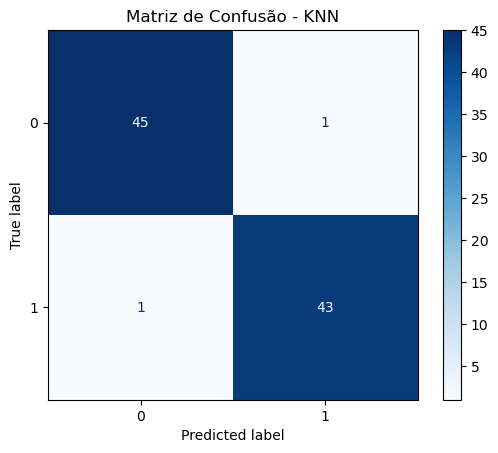

In [41]:
y_pred = knn.predict(X_test_scaled)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:\n")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Matriz de Confusão - KNN")
plt.show()

## 7. Visualização dos Limites de Decisão

Usamos um grid para visualizar como o modelo separa as classes no plano 2D.

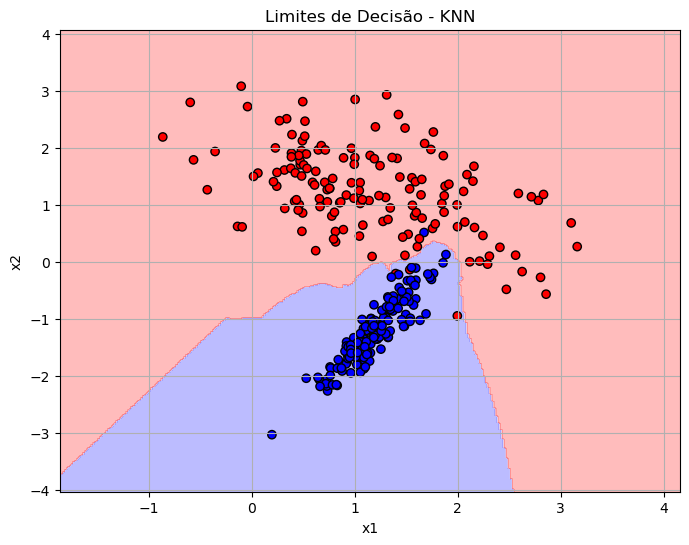

In [42]:
h = .02
x_min, x_max = X["x1"].min() - 1, X["x1"].max() + 1
y_min, y_max = X["x2"].min() - 1, X["x2"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Usar o mesmo scaler aplicado ao conjunto original
grid_points = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["x1", "x2"])
grid_scaled = scaler.transform(grid_points)

Z = knn.predict(grid_scaled)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap="bwr", alpha=0.3)
plt.scatter(X["x1"], X["x2"], c=y, cmap="bwr", edgecolor='k')
plt.title("Limites de Decisão - KNN")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()


## 8. Predição de um Novo Ponto

Vamos prever a classe de um novo ponto `[1.5, 2.0]` usando o modelo treinado.

- Precisão (Precision): entre as previsões positivas, quantas estavam corretas.

- Recall (Sensibilidade): entre as classes positivas reais, quantas foram corretamente previstas.

- F1-score: média harmônica entre precisão e recall.

- Acurácia: proporção geral de acertos.

In [43]:
X_new = pd.DataFrame([[1.5, 2.0]], columns=["x1", "x2"])
X_new_scaled = scaler.transform(X_new)

classe_prevista = knn.predict(X_new_scaled)
print("Classe prevista:", classe_prevista[0])
print(classification_report(y_test, y_pred_knn))

Classe prevista: 1
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.98      0.98      0.98        44

    accuracy                           0.98        90
   macro avg       0.98      0.98      0.98        90
weighted avg       0.98      0.98      0.98        90



## 9. Considerações sobre o KNN

O algoritmo KNN (K-Nearest Neighbors) é simples, intuitivo e eficaz em muitos problemas de classificação. Ele não constrói um modelo explícito durante o treinamento; em vez disso, armazena os dados e realiza a classificação com base nos vizinhos mais próximos no momento da predição.

### Vantagens:
- Fácil de implementar
- Não requer suposições sobre a distribuição dos dados
- Funciona bem com fronteiras complexas

### Desvantagens:
- Custo computacional elevado em grandes bases (depende de toda a base para prever)
- Sensível à escala dos dados (importância do `StandardScaler`)
- Pode ser afetado por ruído e outliers

> 🧠 KNN é um bom modelo de referência para classificação, especialmente em datasets pequenos e com poucos atributos.